<a href="https://www.kaggle.com/agnishwarbagchi/notebook2e094aee60?scriptVersionId=87978971" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_dir = r"../input/fer2013/train"
test_dir = r"../input/fer2013/test"

CATEGORIES = ['angry','disgust','fear','happy','neutral','sad','surprise']    

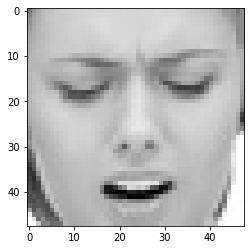

In [5]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
img_array.shape

(48, 48, 3)

In [7]:
IMG_SIZE = 48

train_data = []
test_data = []

def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
get_data(train_dir,train_data)
get_data(test_dir,test_data)

In [8]:
len(train_data), len(test_data)

(28709, 7178)

In [9]:
train_data[0][0].shape

(48, 48, 3)

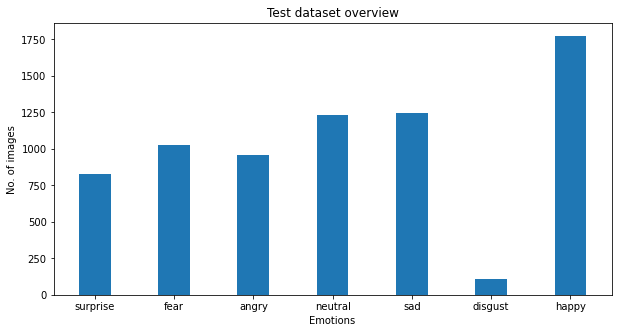

In [10]:
emotions = os.listdir('/kaggle/input/fer2013/test')
values = [len(os.listdir(f'/kaggle/input/fer2013/test/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

plt.bar(emotions, values,
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()

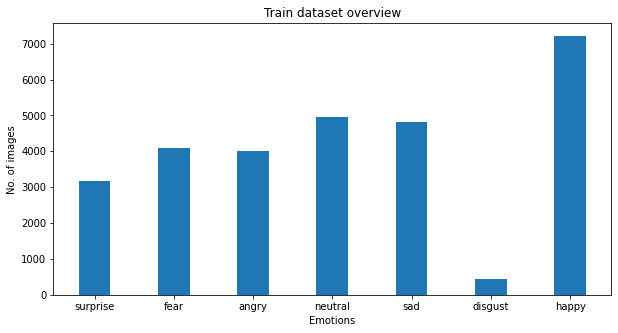

In [11]:
emotions = os.listdir('/kaggle/input/fer2013/train')
values = [len(os.listdir(f'/kaggle/input/fer2013/train/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

plt.bar(emotions, values,
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()

In [12]:
count = 0

for i in range(len(train_data)):
    if train_data[i][1] ==1:
        count+=1
count

436

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten, Dropout

In [14]:
# using data-augmentation technique for generating new images for category disgust

data_augmentation1 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
])

data_augmentation2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.2)
])
# data_augmentation3 = tf.keras.Sequential([
#   layers.experimental.preprocessing.RandomTranslation()
# ])

def apply_augmentation(data):
    for i in range(len(data)):
        if data[i][1] == 1:
            data.append([data_augmentation1(data[i][0]),1])
            data.append([data_augmentation2(data[i][0]),1])
#             data.append([data_augmentation3(data[i][0]),1])
            
apply_augmentation(train_data)
apply_augmentation(test_data)

2022-02-16 09:22:35.490402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:22:35.593235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:22:35.594015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:22:35.595337: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
type(train_data[0][0])

numpy.ndarray

In [16]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [17]:
X_train = []
y_train = []
X_test = []
y_test = []

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])
                          
split_train_test(train_data, X_train,y_train)
split_train_test(test_data, X_test,y_test)

In [18]:
X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,3)
X_test= np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE,3)


y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
X_train.shape

(29581, 48, 48, 3)

In [20]:
X_test.shape

(7400, 48, 48, 3)

In [21]:
from sklearn.model_selection import train_test_split

X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5)

In [22]:
X_test.shape

(3700, 48, 48, 3)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [45]:
model = models.Sequential([
    
  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPooling2D((2,2)),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),

  layers.Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dense(len(CATEGORIES), activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=50, validation_data=(X_val,y_val))

Epoch 1/50
925/925 [==============================] - 5s 5ms/step - loss: 1.9996 - accuracy: 0.2424 - val_loss: 1.7614 - val_accuracy: 0.3022
Epoch 2/50
925/925 [==============================] - 4s 4ms/step - loss: 1.7078 - accuracy: 0.3342 - val_loss: 1.6428 - val_accuracy: 0.3922
Epoch 3/50
925/925 [==============================] - 4s 5ms/step - loss: 1.6146 - accuracy: 0.3760 - val_loss: 1.4978 - val_accuracy: 0.4373
Epoch 4/50
925/925 [==============================] - 4s 4ms/step - loss: 1.5396 - accuracy: 0.4107 - val_loss: 1.5325 - val_accuracy: 0.4311
Epoch 5/50
925/925 [==============================] - 5s 5ms/step - loss: 1.4714 - accuracy: 0.4380 - val_loss: 1.3717 - val_accuracy: 0.4695
Epoch 6/50
925/925 [==============================] - 4s 5ms/step - loss: 1.4280 - accuracy: 0.4564 - val_loss: 1.3600 - val_accuracy: 0.4778
Epoch 7/50
925/925 [==============================] - 4s 4ms/step - loss: 1.3850 - accuracy: 0.4720 - val_loss: 1.3211 - val_accuracy: 0.4941
Epoch 

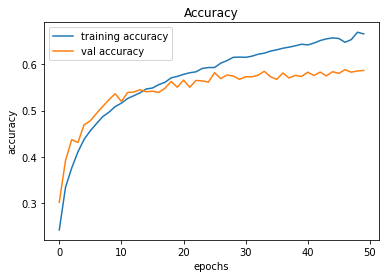

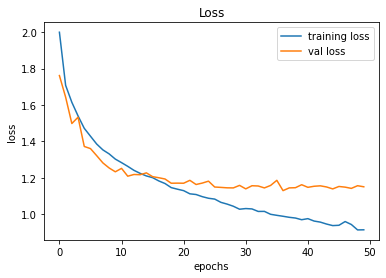

In [48]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(X_test,y_test)

116/116 [==============================] - 0s 2ms/step - loss: 1.2047 - accuracy: 0.5689


[1.2046643495559692, 0.5689189434051514]

In [50]:
predicted = model.predict(X_test)
predicted[:5]

array([[6.37475133e-01, 4.63280547e-03, 3.93440202e-02, 6.53286874e-02,
        6.83016554e-02, 1.77587628e-01, 7.33001344e-03],
       [7.23732561e-02, 8.25705007e-03, 2.88585663e-01, 3.66893820e-02,
        2.56298453e-01, 1.81432679e-01, 1.56363472e-01],
       [1.63494013e-02, 2.37706568e-04, 2.53434390e-01, 2.80612439e-01,
        1.13159962e-01, 2.29432955e-02, 3.13262761e-01],
       [1.39369413e-01, 2.13210285e-03, 8.11839029e-02, 4.87482250e-01,
        3.30775380e-02, 2.48212349e-02, 2.31933594e-01],
       [9.36481282e-02, 5.53745590e-03, 1.08638771e-01, 5.07220924e-02,
        1.16447255e-01, 6.19117081e-01, 5.88922203e-03]], dtype=float32)

In [51]:
predicted = [np.argmax(i) for i in predicted]
predicted[:5]

[0, 2, 6, 3, 5]

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(33.0, 0.5, 'Truth')

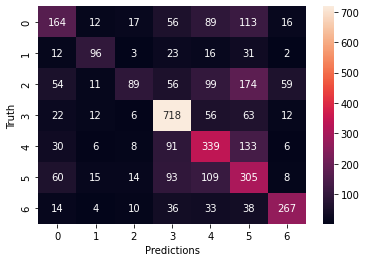

In [43]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [53]:
model.save('emotion_detector.h5')